In [376]:
"""
Edward Pascual-Bautista
ECGR 4105 HW1
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [377]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [378]:
m = len(housing)
m

545

In [379]:
housing.shape

(545, 13)

In [380]:
np.random.seed(0)

df_Train, df_Test = train_test_split(housing, train_size = 0.8, test_size = 0.2)

df_Train.shape

(436, 13)

In [381]:
df_test.shape

(109, 13)

In [382]:
m1 = len(df_Train)
m1

436

In [383]:
m2 = len(df_Test)
m2

109

In [384]:
x_Train = df_Train[['area','bedrooms','bathrooms','stories','parking']]
x_Test = df_Test[['area','bedrooms','bathrooms','stories','parking']]

y_Train = df_Train[['price']]
y_Test = df_Test[['price']]

y_Train[:5]

,price
542,1750000
496,2695000
484,2870000
507,2590000
252,4515000


In [385]:
x0 = np.ones((m1,1))
x_0 = np.ones((m2,1))
x0[:3]

array([[1.],
       [1.],
       [1.]])

In [386]:
xTr = x_Train.values
xTe = x_Test.values

In [387]:
x1 = np.hstack((x0,xTr))
x2 = np.hstack((x_0,xTe))
x1[:4]


array([[1.00e+00, 3.62e+03, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 4.00e+03, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 3.04e+03, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 3.60e+03, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00]])

In [388]:
yTr = y_Train.values
yTe = y_Test.values
yTr.shape

(436, 1)

In [389]:
theta = np.zeros(6)

theta

array([0., 0., 0., 0., 0., 0.])

In [390]:
def get_cost(x1, yTr, theta):
    H = x1.dot(theta)
    error = np.subtract(H, yTr)
    sqrError = np.square(error)
    J = 1 / (2*m) * np.sum(sqrError)
    
    return J

In [391]:
def grad_descent(x1, yTr, theta, alpha, iterations, x2, yTe):
    
    cost_history = np.zeros(iterations)
    vali_cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        H = x1.dot(theta)
        error = np.subtract(H, yTr)
        delta_sum = (alpha / m) * x1.transpose().dot(error);
        theta = theta - delta_sum
        cost_history[i] = get_cost(x1, yTr, theta)
        vali_cost_history[i] = get_cost(x2, yTe, theta)
        
        return theta, cost_history, vali_cost_history

In [395]:
theta = np.zeros(6)
theta = theta.reshape(6,1)
iterations = 25;
alpha = 0.01;

In [396]:
theta, cost_history, vali_cost_history = grad_descent(x1, yTr, theta, alpha, iterations, x2, yTe)

print(theta)
print(cost_history)
print(vali_cost_history)

[[3.82210815e+04]
 [2.14260071e+08]
 [1.17564070e+05]
 [5.26780620e+04]
 [7.48306653e+04]
 [3.23576400e+04]]
[5.71174101e+23 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[1.45640384e+23 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


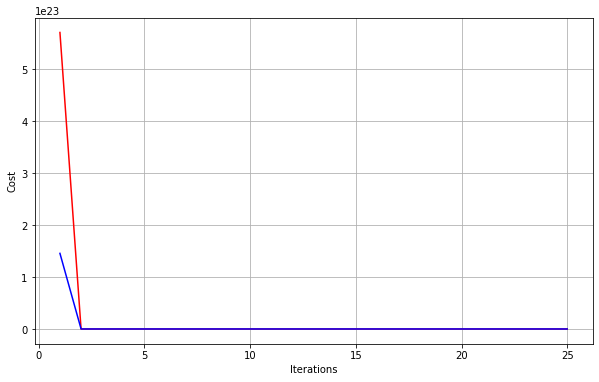

In [397]:
plt.plot(range(1, iterations + 1), cost_history, color = 'red')
plt.plot(range(1, iterations + 1), vali_cost_history, color = 'blue')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


In [373]:
df_train_b, df_test_b = train_test_split(housing, train_size = 0.7, test_size = 0.3)

In [374]:
x_Train_b = df_train_b[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']]
x_Test_b = df_test_b[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']]

y_Train_b = df_train_b[['price']].values
y_Test_b = df_test_b[['price']].values

x_Train_b[:4]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
223,6321,3,1,2,yes,no,yes,no,yes,1,no
117,3700,4,1,2,yes,yes,no,no,yes,0,no
176,8520,3,1,1,yes,no,no,no,yes,2,no
166,7800,3,1,1,yes,no,yes,no,yes,2,yes


In [375]:
x_Train_b.shape

(381, 11)

In [320]:
m3 = len(y_Train_b)
m4 = len(y_Test_b)


381

In [328]:
x0_b = np.ones((m3,1))
x_0_b = np.ones((m4,1))

x1_b = np.hstack((x0_b, x_Train_b))
x2_b = np.hstack((x_0_b, x_Test_b))


In [323]:
theta_b = np.zeros(12)
theta_b = theta_b.reshape(12,1)
theta_b.shape

(12, 1)

In [325]:
def get_cost(x1_b, y_Train_b, theta_b):
    H = x1_b.dot(theta_b)
    error = np.subtract(H, y_Train_b)
    sqrError = np.square(error)
    J = 1 / (2*m) * np.sum(sqrError)
    
    return J

In [329]:
def grad_descent(x1_b, y_Train_b, theta_b, alpha, iterations, x2_b, y_Test_b):
    
    cost_history_b = np.zeros(iterations)
    vali_cost_history_b = np.zeros(iterations)
    
    for i in range(iterations):
        H = x1_b.dot(theta_b)
        error = np.subtract(H, y_Train_b)
        delta_sum = (alpha / m) * x1_b.transpose().dot(error);
        theta_b = theta_b - delta_sum
        cost_history_b[i] = get_cost(x1_b, y_Train_b, theta_b)
        vali_cost_history_b[i] = get_cost(x2_b, y_Test_b, theta_b)
        
        return theta_b, cost_history_b, vali_cost_history_b

In [301]:
theta = np.zeros(6)
theta = theta.reshape(6,1)
iterations = 25;
alpha = 0.00001;

In [330]:
theta_b, cost_history_b, vali_cost_history_b = grad_descent(x1_b, y_Train_b, theta_b, alpha, iterations, x2_b, y_Test_b)

print(theta_b)
print(cost_history_b)
print(vali_cost_history_b)

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
[nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]
[nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]
